## SIADS Milestone I: CFB Analysis

This notebook will help answer these questions: 

1. What’s the minimum talent threshold required to compete at the top of the sport?  
2. Teams that were in the championship vs. the teams that weren’t in the championships, what % were drafted? 


In [91]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [92]:
pd.set_option('display.max_columns', None)

### 1. What's the minimum talent threshold required to compete at the top of the sport? 


**Approach:** 
We are going to leveraging the ELO rating to evaluate what the top of the sport means. 
And the minimum talent threshold we will be looking is the recruitment rating 

**Visuals:** 

ELO rating vs. Team Roster: 
* higher ELO meeadning that they played at the top of the sport - Hue oof the Championships (Almost Done)

Percentile Visual:
* X-axis percentile of the ELO rating (top 10%)
* Y-axis % of all championships that are in the percentile 

**Data Manipulation:**




In [93]:
# df_teams = pd.read_csv('../data/teams.csv',low_memory=False)
# df_recruits = pd.read_csv('../data/recruits.csv',low_memory=False)
# df_roster = pd.read_csv('../data/roster.csv',low_memory=False)
# df_draft = pd.read_csv('../data/draft.csv',low_memory=False)
# df_team_talent = pd.read_csv('../data/team_talent.csv',low_memory=False)

In [94]:
df = pd.read_csv('../data/games_manipulated.csv', low_memory=False)
df_team_talent = pd.read_csv('../data/team_talent.csv',low_memory=False)

print(df.head().to_markdown(), '\n')
print(df_team_talent.head().to_markdown() )

|    |   Unnamed: 0 |   index |        id |   season |   week | season_type   | start_date               |   start_time_tbd | completed   | neutral_site   | conference_game   |   attendance |   venue_id | venue                  |   excitement_index |   highlights |   notes | main_team      |   home_game_flag |   team_id |   opposing_team_id | team_conference   | opposing_conference   |   points_for |   points_against |   point_differential | team_line_scores   | opposing_line_scores   |   team_pregame_elo |   team_postgame_elo |   opponent_pregame_elo |   opponent_postgame_elo |   win_flag |   game_that_season |
|---:|-------------:|--------:|----------:|---------:|-------:|:--------------|:-------------------------|-----------------:|:------------|:---------------|:------------------|-------------:|-----------:|:-----------------------|-------------------:|-------------:|--------:|:---------------|-----------------:|----------:|-------------------:|:------------------|:---------------

In [95]:
## When does this missingness happen? 
power_5_conf = ['Pac-12', 'Big 12', 'ACC', 'SEC', 'Big Ten']

# narrow down the dataframe with just these columns
cols = ['season', 'game_that_season', 'season_type',
         'team_conference','main_team','opposing_team_id',
         'conference_game','team_postgame_elo', 
         'team_pregame_elo', 'win_flag']
filtered_df = df[cols]

# Filter down thee population to the following
filtered_df = filtered_df[filtered_df['game_that_season'] == 12] # moroe ELO data 
filtered_df = filtered_df[filtered_df['team_conference'].isin(power_5_conf)] # more serious teams
filtered_df = filtered_df[filtered_df['season'] != 2020] # outliar

# Rename columns 
filtered_df.rename(columns={'season':'year', 'main_team': 'school'},inplace=True) 
print(filtered_df.head().to_markdown() )

# Only look at schoools that are in the power 5 conference
teams = filtered_df['school'].unique() 
print(f'\nTeams that participate in the Power 5 Conference:\n\n{teams}\n') 
filtered_team_talend_df = df_team_talent[df_team_talent['school'].isin(teams)]
print(filtered_team_talend_df.head().to_markdown() )


|    |   year |   game_that_season | season_type   | team_conference   | school         |   opposing_team_id | conference_game   |   team_postgame_elo |   team_pregame_elo |   win_flag |
|---:|-------:|-------------------:|:--------------|:------------------|:---------------|-------------------:|:------------------|--------------------:|-------------------:|-----------:|
|  6 |   2013 |                 12 | regular       | SEC               | South Carolina |                228 | False             |                2024 |               2001 |          1 |
| 20 |   2015 |                 12 | regular       | SEC               | South Carolina |                228 | False             |                1579 |               1561 |          0 |
| 35 |   2017 |                 12 | regular       | SEC               | South Carolina |                228 | False             |                1572 |               1586 |          0 |
| 42 |   2018 |                 12 | regular       | SEC         

In [96]:
# Combine the team talent talent data with the teams ELO 
total_elo_talent = pd.merge(filtered_team_talend_df, filtered_df, on=['year', 'school']) 
total_elo_talent.head() 

,year,school,talent,game_that_season,season_type,team_conference,opposing_team_id,conference_game,team_postgame_elo,team_pregame_elo,win_flag
0,2015,Alabama,981.90,12,regular,SEC,2,True,2097.0,2098.0,1
1,2015,USC,926.71,12,regular,Pac-12,26,True,1840.0,1798.0,1
2,2015,Ohio State,907.32,12,regular,Big Ten,130,True,2107.0,2052.0,1
3,2015,Florida State,889.92,12,regular,ACC,57,False,1938.0,1872.0,1
4,2015,LSU,889.37,12,postseason,SEC,2641,False,1817.0,1769.0,1


In [97]:
# Get the Championship flag 
substr_1 = 'NATIONAL CHAMPIONSHIP'
substr_2 = 'National Championship'

df = df[df['notes'].notna()]
a = df[df['notes'].str.contains(substr_1)]
b = df[df['notes'].str.contains(substr_2)]

championship_games = pd.concat([a, b])
championship_games['championship_appearance'] = 1
championship_games = championship_games.sort_values(by = 'season', ascending = True)[['main_team', 'season', 'win_flag', 'championship_appearance']]

championship_games= championship_games.rename(columns={'main_team': 'school', 'season': 'year'})
print(championship_games.to_markdown())

# Check that there are two teams perseason that went to the championship 
# championship_games.groupby('season')['championship_appearance'].count()

|       | school        |   year |   win_flag |   championship_appearance |
|------:|:--------------|-------:|-----------:|--------------------------:|
| 11244 | Auburn        |   2013 |          0 |                         1 |
| 25045 | Florida State |   2013 |          1 |                         1 |
|  5104 | Ohio State    |   2014 |          1 |                         1 |
|  8324 | Oregon        |   2014 |          0 |                         1 |
| 13351 | Clemson       |   2015 |          0 |                         1 |
| 29958 | Alabama       |   2015 |          1 |                         1 |
| 29896 | Alabama       |   2016 |          0 |                         1 |
| 13416 | Clemson       |   2016 |          1 |                         1 |
| 18029 | Georgia       |   2017 |          0 |                         1 |
| 29960 | Alabama       |   2017 |          1 |                         1 |
| 13417 | Clemson       |   2018 |          1 |                         1 |
| 29898 | Al

In [98]:
# Left Join the Championship data into the total_elo_talent
elo_championship_df = total_elo_talent.merge( championship_games, on=['year', 'school'], how='left' )
elo_championship_df['championship_appearance'] = elo_championship_df['championship_appearance'].fillna(0) # Fill na with 0 
elo_championship_df.head() 

,year,school,talent,game_that_season,season_type,team_conference,opposing_team_id,conference_game,team_postgame_elo,team_pregame_elo,win_flag_x,win_flag_y,championship_appearance
0,2015,Alabama,981.90,12,regular,SEC,2,True,2097.0,2098.0,1,1.0,1.0
1,2015,USC,926.71,12,regular,Pac-12,26,True,1840.0,1798.0,1,NaN,0.0
2,2015,Ohio State,907.32,12,regular,Big Ten,130,True,2107.0,2052.0,1,NaN,0.0
3,2015,Florida State,889.92,12,regular,ACC,57,False,1938.0,1872.0,1,NaN,0.0
4,2015,LSU,889.37,12,postseason,SEC,2641,False,1817.0,1769.0,1,NaN,0.0


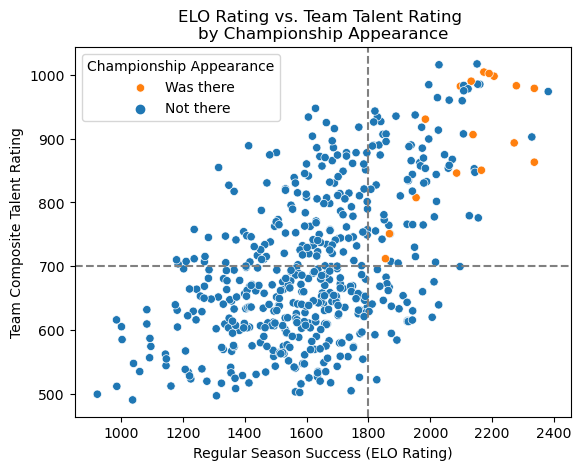

In [99]:
# Plot the Team's ELO and Talent Roster
scatter = sns.scatterplot(data=elo_championship_df, x='team_postgame_elo', y='talent', hue='championship_appearance')

x_value = 1800.0
y_value = 700.0

# Add labels to x-axis and y-axis
plt.xlabel('Regular Season Success (ELO Rating)')
plt.ylabel('Team Composite Talent Rating')

plt.axvline(x=x_value, color='gray', linestyle='--')
plt.axhline(y=y_value, color='gray', linestyle='--')
scatter.legend(title='Championship Appearance', labels=['Was there', 'Not there'], loc='upper left')
               
plt.title('ELO Rating vs. Team Talent Rating \nby Championship Appearance' )
plt.show() 

In [112]:
import altair as alt

scatter = alt.Chart(elo_championship_df).mark_circle(size = 60, opacity = .90).encode(
    alt.X('talent:Q', scale=alt.Scale(domain=[400, 1100]), title = 'Team Composite Talent Rating'),
    alt.Y('team_postgame_elo:Q', scale=alt.Scale(domain=[800, 2500]), title = 'Regular Season Success (ELO Rating)'),
    color = 'championship_appearance:N',
    tooltip = ['year']).properties(
    width = 500, height = 500, title = 'Team Talent Rating vs Regular Season Success (ELO)')

elo_line = alt.Chart(elo_championship_df).mark_rule(color="#e60634", size = 3, strokeDash=[9,3], opacity = .85).encode(
    y = 'mean(team_postgame_elo)')

talent_line = alt.Chart(elo_championship_df).mark_rule(color="#e60634", size = 3, strokeDash=[9,3], opacity = .85).encode(
    x = 'mean(talent)')

final  = scatter + elo_line + talent_line

final

alt.LayerChart(...)

## 2. Teams that were in the championship vs. the teams that weren't, what % were drafted? 

**Approoach** Show a simple bar graph with the x-axis as Championship and y-axis as the % that were drafted. 
